In [1]:
import pandas as pd
import numpy as np

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
import os
colors = list(mcolors.TABLEAU_COLORS.keys())*2



full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    #'JP': 'Japan',
    #'KE': 'Kenia',
    'MX': 'Mexico',
    #'NG': 'Nigeria',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark'
}

parentDirectory = os.path.abspath(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

In [2]:
event_dicts = [{'country': 'AU',
  'start_md_1': '2020-03-27',
  'end_md_1': '2020-06-07',
  'start_md_2': np.nan},
 {'country': 'BR',
  'start_md_1': '2020-03-23',
  'end_md_1': '2020-08-09',
  'start_md_2': np.nan},
 {'country': 'CA',
  'start_md_1': '2020-03-19',
  'end_md_1': '2020-06-21',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'start_md_1': '2020-03-21',
  'end_md_1': '2020-05-09',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'start_md_1': '2020-03-17',
  'end_md_1': '2020-05-07',
  'start_md_2': np.nan},
 {'country': 'ES',
  'start_md_1': '2020-03-17',
  'end_md_1': '2020-06-14',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'start_md_1': '2020-03-18',
  'end_md_1': '2020-06-08',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'start_md_1': '2020-03-23',
  'end_md_1': '2020-08-03',
  'start_md_2': '2020-10-21'},
 {'country': 'IN',
  'start_md_1': '2020-03-24',
  'end_md_1': '2020-10-29',
  'start_md_2': np.nan},
 {'country': 'IT',
  'start_md_1': '2020-03-11',
  'end_md_1': '2020-06-06',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'start_md_1': '2020-04-12',
  'end_md_1': '2020-05-30',
  'start_md_2': np.nan},
 {'country': 'KE',
  'start_md_1': '2020-03-24',
  'end_md_1': '2020-10-04',
  'start_md_2': np.nan},
 {'country': 'MX',
  'start_md_1': '2020-03-25',
  'end_md_1': '2020-10-06',
  'start_md_2': np.nan},
 {'country': 'NG',
  'start_md_1': '2020-03-27',
  'end_md_1': '2020-08-09',
  'start_md_2': np.nan},
 {'country': 'US',
  'start_md_1': '2020-03-21',
  'end_md_1': '2020-06-11',
  'start_md_2': '2020-11-26'}]

In [3]:
df_events = pd.DataFrame(event_dicts)

In [4]:
df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

In [5]:
df_agg = pd.read_pickle(DATA_DIR+'modes_coarse.pickle')

In [6]:
df_agg

,country,category,volume_weekly_total,volume_weekly_total_l,volume_weekly_total_h,volume_percent_weekly_total
0,FR,Mode 1,2019-01-06 2785.960793 2019-01-13 2773.5...,2019-01-06 2458.715557 2019-01-13 2448.5...,2019-01-06 3160.899878 2019-01-13 3145.9...,2019-01-06 0.659807 2019-01-13 0.642624 ...
1,FR,Mode 2,2019-01-06 3.640363 2019-01-13 3.91838...,2019-01-06 3.399005 2019-01-13 3.66225...,2019-01-06 3.920400 2019-01-13 4.19104...,2019-01-06 0.000862 2019-01-13 0.000908 ...
2,FR,Mode 3,2019-01-06 1422.335594 2019-01-13 1525.7...,2019-01-06 1257.986565 2019-01-13 1350.5...,2019-01-06 1610.285529 2019-01-13 1726.1...,2019-01-06 0.336856 2019-01-13 0.353518 ...
3,FR,Mode 4,2019-01-06 10.452691 2019-01-13 12.73262...,2019-01-06 8.503778 2019-01-13 10.65624...,2019-01-06 12.645970 2019-01-13 15.06377...,2019-01-06 0.002476 2019-01-13 0.002950 ...
4,DE,Mode 1,2019-01-06 639.344263 2019-01-13 624.6...,2019-01-06 577.355549 2019-01-13 563.9...,2019-01-06 708.781324 2019-01-13 692.6...,2019-01-06 0.563664 2019-01-13 0.549868 ...
5,DE,Mode 2,2019-01-06 5.845501 2019-01-13 5.93010...,2019-01-06 5.458692 2019-01-13 5.54840...,2019-01-06 6.257302 2019-01-13 6.33646...,2019-01-06 0.005154 2019-01-13 0.005220 ...
6,DE,Mode 3,2019-01-06 482.106699 2019-01-13 497.390...,2019-01-06 435.653090 2019-01-13 449.706...,2019-01-06 534.205604 2019-01-13 550.841...,2019-01-06 0.425039 2019-01-13 0.437857 ...
7,DE,Mode 4,2019-01-06 6.968641 2019-01-13 8.01393...,2019-01-06 6.452518 2019-01-13 7.45810...,2019-01-06 7.519291 2019-01-13 8.60641...,2019-01-06 0.006144 2019-01-13 0.007055 ...
8,US,Mode 1,2019-01-06 1024.325276 2019-01-13 1035.2...,2019-01-06 919.558903 2019-01-13 929.4...,2019-01-06 1142.404042 2019-01-13 1154.4...,2019-01-06 0.561272 2019-01-13 0.564239 ...
9,US,Mode 2,2019-01-06 28.183634 2019-01-13 26.82762...,2019-01-06 26.311899 2019-01-13 25.01567...,2019-01-06 30.207382 2019-01-13 28.78782...,2019-01-06 0.015443 2019-01-13 0.014622 ...


In [7]:
weeks_2019 = list(df_agg.iloc[0]['volume_weekly_total'].index)[:52]
weeks_2020 = list(df_agg.iloc[0]['volume_weekly_total'].index)[52:]

In [8]:
l = []
for cnt, row in df_agg.iterrows():
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']
    
    for week in zip(row['volume_weekly_total'].index,row['volume_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        

        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])
            
            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2019'
            l.append(entry)

In [9]:
df = pd.DataFrame(l)

In [10]:
df

,country,category,k,volume_total,volume_percent,year
0,FR,Mode 1,-10,2785.960793,0.659807,2019
1,FR,Mode 1,-9,2773.587295,0.642624,2019
2,FR,Mode 1,-8,2769.001158,0.636911,2019
3,FR,Mode 1,-7,2813.607733,0.637242,2019
4,FR,Mode 1,-6,2637.246233,0.590838,2019
...,...,...,...,...,...,...
4571,DK,Mode 4,37,6.050981,0.010544,2020
4572,DK,Mode 4,38,6.660921,0.011649,2020
4573,DK,Mode 4,39,3.666972,0.006695,2020
4574,DK,Mode 4,40,5.975060,0.009378,2020


In [11]:
k = 30

In [12]:
df = df.loc[(df['k'] >= -30) & (df['k'] <= 30)].copy()

In [13]:
df['intervention_flag'] = df['k'].apply(lambda x: 1 if x >= 0 else 0)

In [14]:
df

,country,category,k,volume_total,volume_percent,year,intervention_flag
0,FR,Mode 1,-10,2785.960793,0.659807,2019,0
1,FR,Mode 1,-9,2773.587295,0.642624,2019,0
2,FR,Mode 1,-8,2769.001158,0.636911,2019,0
3,FR,Mode 1,-7,2813.607733,0.637242,2019,0
4,FR,Mode 1,-6,2637.246233,0.590838,2019,0
...,...,...,...,...,...,...,...
4560,DK,Mode 4,26,6.132954,0.010038,2020,1
4561,DK,Mode 4,27,8.810930,0.015258,2020,1
4562,DK,Mode 4,28,6.610673,0.011875,2020,1
4563,DK,Mode 4,29,4.740510,0.007827,2020,1


In [15]:
def generate_equation(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year + intervention_flag*np.power(k,3)*year"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year"
    return eq
    

In [16]:
def generate_equation_interactions(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category) + intervention_flag*np.power(k,3)*year*C(country)*C(category)"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category)"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category)"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year*C(country)*C(category)"
    return eq
    

In [17]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()

df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

mod = smf.ols(generate_equation_interactions('Constant'), data = df_temp)

result_interactions = mod.fit(cov_type='hc0')

In [18]:
def get_standard_error_sum(covariates):
    '''
    #95CI is approximated with +- 2 sum_variance_standard_error
    '''
    
    #get the variance covariance matrix
    vcov = result_interactions.cov_params()\
        .loc[covariates,covariates].values
    
    #calculate the sum of all pair wise covariances by summing up
    m_sum = np.sum(vcov)
    
    #variance of a sum of variables is the square root
    return np.sqrt((m_sum))

In [19]:
cats = ['Mode 1','Mode 2','Mode 3','Mode 4']

In [20]:
default_country = 'AU'
default_category = 'Mode 1'

alpha_baseline = 'intervention_flag:year[T.2020]'

list_results = []



for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            

            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
   

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            


        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))


        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error

        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)

In [21]:
countries_sorted = list(df_results.loc[df_results['category'] == 'Mode 1'].\
                        sort_values(by = 'alpha', ascending = False)['country'].values)

In [22]:
cats_sorted = list(df_results.groupby('category')['alpha'].agg('mean').sort_values(ascending = False).index)
#countries_sorted = list(df_results.groupby('country')['alpha'].\
#     agg('mean').sort_values(ascending = False).index)

In [23]:
sorterIndex = dict(zip(countries_sorted, range(len(countries_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

In [24]:
dict_annotate = {'Mode 1': 'Recipe, cooking, baking, grocery\n store, supermarket',
                 'Mode 2': 'Food delivery, take-out,\n drive-in', 
                 'Mode 3': 'Restaurant, careteria, cafe,\n diner, food festival', 
                 'Mode 4': 'Picnic, barbecue, \nlunchbox'}

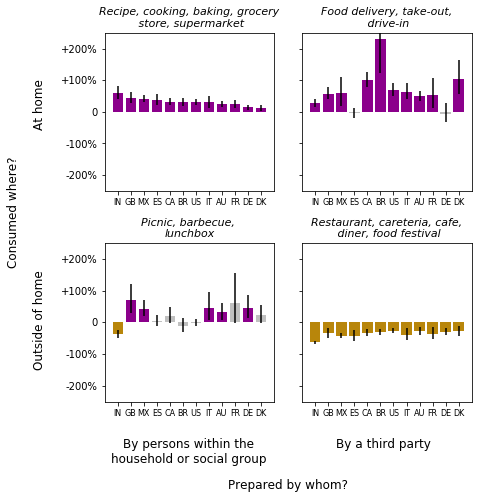

In [25]:
fig, axes = plt.subplots(2,2, figsize = (6,6), sharey = True)

for cnt,c in enumerate(['Mode 1','Mode 2','Mode 4','Mode 3']):
    sbplt = axes[math.floor(cnt/2), cnt%2]
    x = df_results.loc[df_results['category'] == c].iloc[sort_by_custom_dict(df_results.loc[df_results['category'] == c]['country'])][['alpha','country','alpha_ste']]
    
    colors_bars = []
    for i in range(12):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('silver')
            
    #sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1), yerr = 2*x['alpha_ste'].apply(lambda x: np.exp(x)-1), color = colors_bars)
    
    sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars)
    
    sbplt.set_xticks(range(12))
    sbplt.set_xticklabels(x['country'], fontsize= 8)
    sbplt.set_title(dict_annotate[c], size= 11, style='italic')
    
    sbplt.set_yticks([-2,-1,0,1,2])
    sbplt.set_yticklabels(["-200%","-100%","0","+100%","+200%"])
    sbplt.set_ylim([-2.5,2.5])

#fig.suptitle("α", position = (0.5, 1.05))

size_l = 12
fig.text(0.55, -0.14, 'Prepared by whom?', ha='center', fontsize= size_l)
fig.text(0.32, -0.08, 'By persons within the\nhousehold or social group', ha='center', fontsize= size_l)
fig.text(0.77, -0.08, 'By a third party\n', ha='center', fontsize= size_l)

fig.text(-0.1, 0.5, 'Consumed where?', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.25, 'Outside of home', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.75, 'At home', va='center', rotation='vertical', fontsize= size_l)
plt.tight_layout()

plt.savefig(FIGURES_DIR+"appendix_constant_modes.pdf", bbox_inches='tight')